In [1]:
import numpy as np

In [2]:
pwd

'C:\\Python Files\\AluminaConcEstimator\\NoteBooks'

In [3]:
import sys
sys.path.append('../')

In [4]:
from Refactor.Properties import ValidProperty, CellProperties
from Refactor.Model import VariableVector, ControlMatrix, clone_vector
from Refactor.CellVoltage import VIcell
from numpy.linalg import inv
from scipy.linalg import cholesky, LinAlgError

In [5]:
# Need to define the cell first
bbcell = CellProperties()

In [6]:
# need to extract gamma to define the control matrices - it has dependency on a valid CE
gamma, validg = bbcell.gamma
print(gamma, validg)

1.664337575188073e-05 True


In [7]:
C = np.arange(2.0,7.0,0.1)

In [8]:
C

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9])

In [9]:
np.size(C)

50

In [10]:
V = np.zeros_like(C) 
Erev = np.zeros_like(C)
Eca = np.zeros_like(C)
Esa = np.zeros_like(C)
Ecc = np.zeros_like(C)
Rpath = np.zeros_like(C)

In [11]:
V

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
for i in range(50):
    V[i], I, Erev[i], Eca[i], Esa[i], Ecc[i], Rpath[i], valid = VIcell(C[i], 2.9, 0.0, 126000, bbcell)

In [13]:
V

array([4.68280283, 4.60772256, 4.56666765, 4.54042893, 4.52205971,
       4.50842334, 4.49788817, 4.48951695, 4.4827301 , 4.47714809,
       4.47251081, 4.46863314, 4.46537922, 4.46264664, 4.46035645,
       4.45844661, 4.45686749, 4.45557881, 4.45454743, 4.45374578,
       4.45315065, 4.45274234, 4.45250396, 4.45242093, 4.45248058,
       4.4526718 , 4.45298481, 4.45341096, 4.45394253, 4.45457265,
       4.4552951 , 4.45610431, 4.45699521, 4.45796322, 4.45900413,
       4.46011412, 4.46128967, 4.46252753, 4.46382473, 4.46517851,
       4.4665863 , 4.46804574, 4.4695546 , 4.47111083, 4.47271249,
       4.47435779, 4.47604503, 4.47777261, 4.47953904, 4.48134292])

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Simulated Voltage vs cAl2O3 at constant ACD')

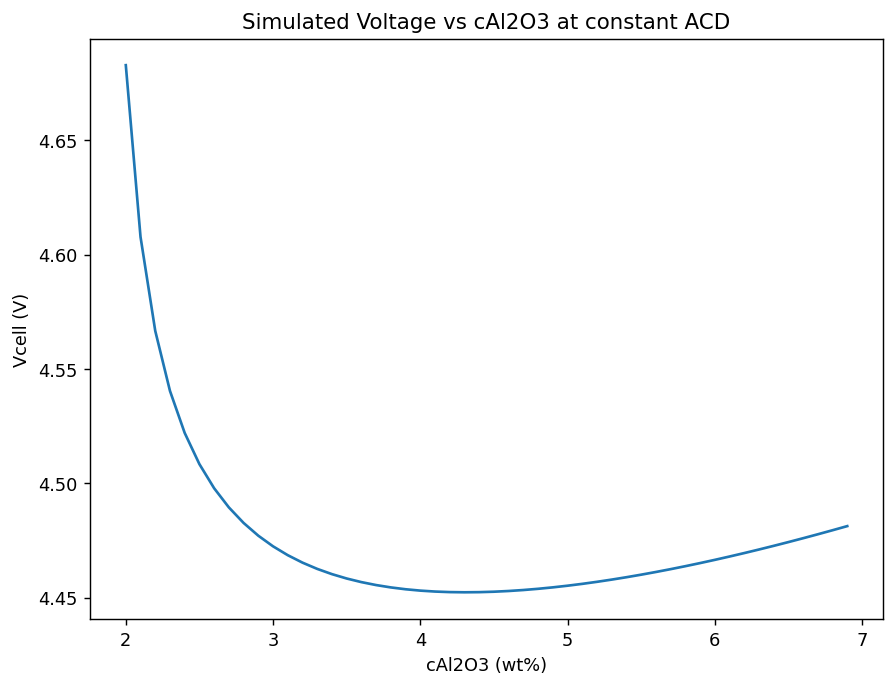

In [15]:
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, V)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Vcell (V)')
plt.title('Simulated Voltage vs cAl2O3 at constant ACD')


Text(0.5, 1.0, 'Simulated reversible potential vs cAl2O3 at constant ACD')

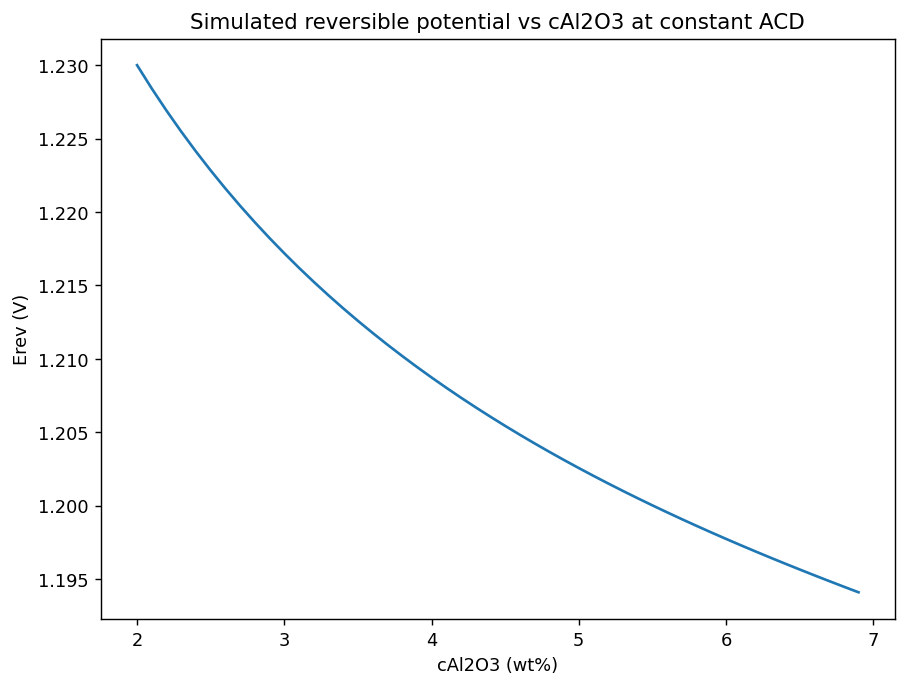

In [16]:
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, Erev)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Erev (V)')
plt.title('Simulated reversible potential vs cAl2O3 at constant ACD')

Text(0.5, 1.0, 'Simulated anode conc overvoltage vs cAl2O3 at constant ACD')

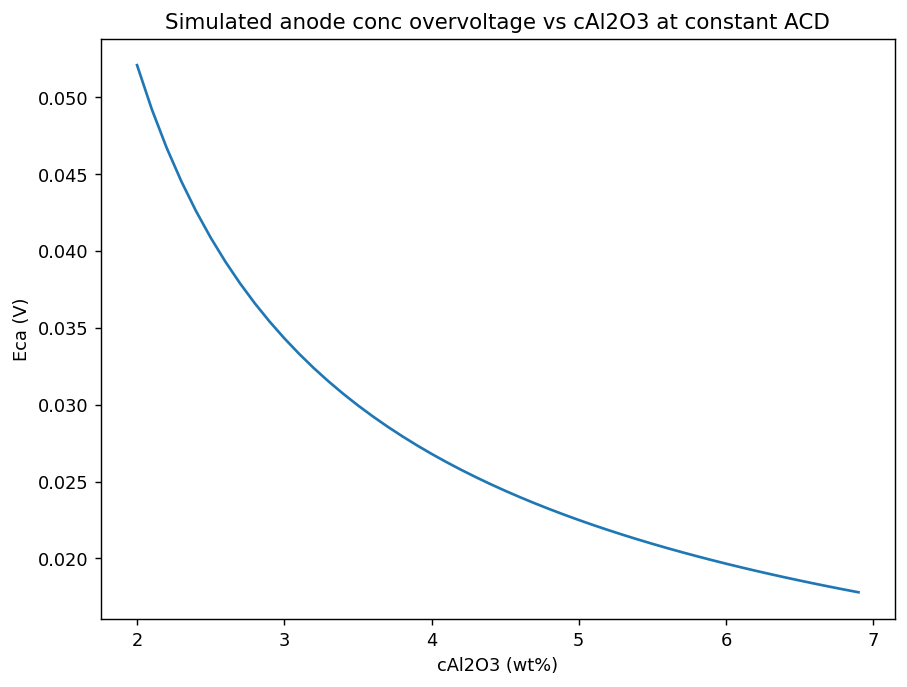

In [17]:
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, Eca)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Eca (V)')
plt.title('Simulated anode conc overvoltage vs cAl2O3 at constant ACD')

Text(0.5, 1.0, 'Simulated anode surface overvoltage vs cAl2O3 at constant ACD')

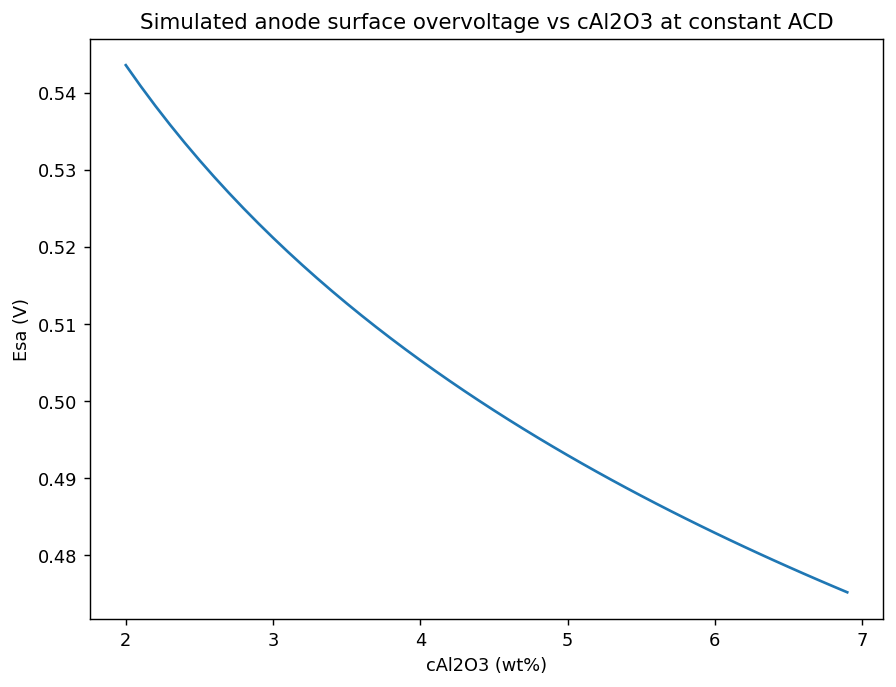

In [18]:
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, Esa)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Esa (V)')
plt.title('Simulated anode surface overvoltage vs cAl2O3 at constant ACD')

Text(0.5, 1.0, 'Simulated cathode conc overvoltage vs cAl2O3 at constant ACD')

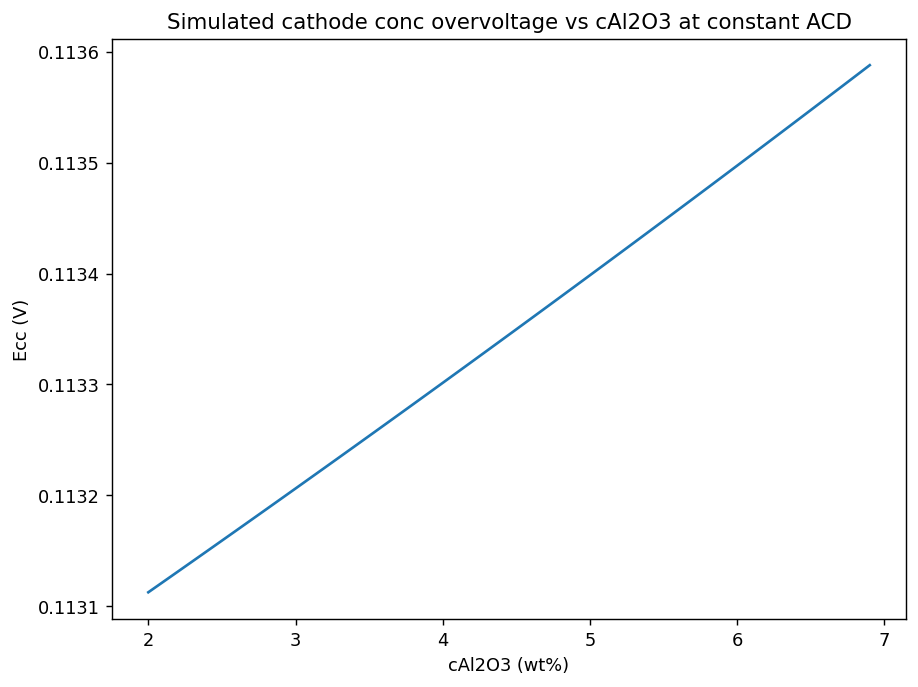

In [19]:
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, Ecc)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Ecc (V)')
plt.title('Simulated cathode conc overvoltage vs cAl2O3 at constant ACD')

Text(0.5, 1.0, 'Simulated resistive bath volts vs cAl2O3 at constant ACD')

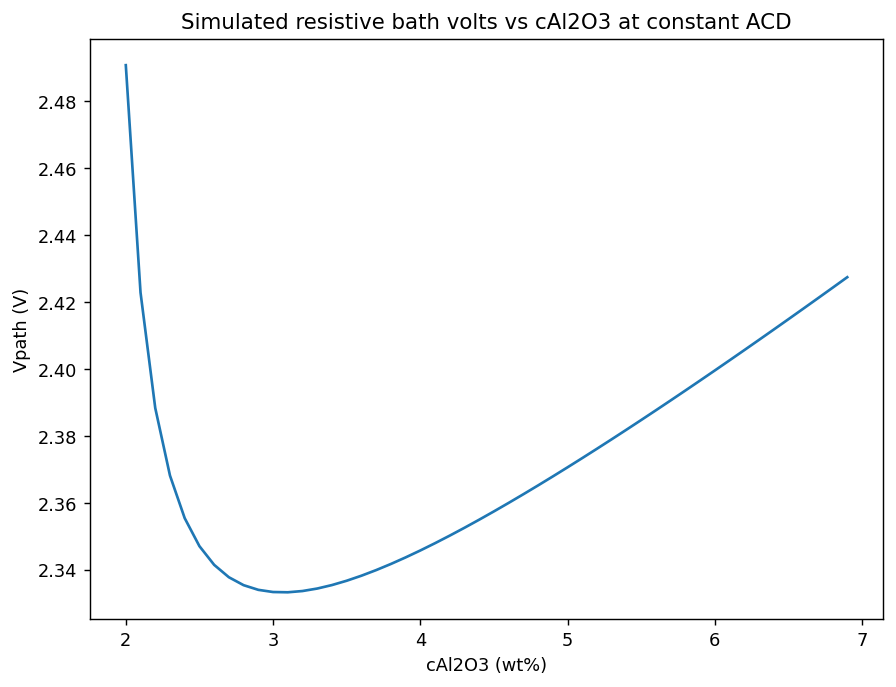

In [20]:
Vpath = Rpath*126000
plt.figure(figsize=(8, 6), dpi=128)
plt.plot(C, Vpath)
plt.xlabel('cAl2O3 (wt%)')
plt.ylabel('Vpath (V)')
plt.title('Simulated resistive bath volts vs cAl2O3 at constant ACD')